# Differing Water Quality in Protected and Unprotected U.S. Southwest

River Basins

Samantha Nauman, Madison Schartz, Hanna Velicer (Colorado State University)

# Drafting the Introduction, Background, and Motivation for the Project

Water quality is currently one of the most pressing environmental challenges across the globe, directly impacting both ecosystem and human health, along with biodiversity. Looking specifically at Colorado, there are growing concerns over the state of local river systems due to increased runoff and nutrient pollution (@ator2022effects). These concerns call for a better understanding of how protection policies could help mitigate threats to water quality. While some laws and frameworks are in place to control pollution and other harmful factors, these protections vary in their ability to truly protect aquatic ecosystems. In this project, we will be addressing the hypothesis that areas designated as “protected,” due to endangered species, their location, etc., have stronger safeguards against various environmental stressors (ie pollution) than areas with no “protected” designation, leading to better water quality. This research is crucial for aiding in conservation policy, especially with increasing urbanization, climate change, and ongoing pollution.

River ecosystems serve as habitat for many organisms and also provide economic resources. Despite this, they continue to be threatened by anthropogenic activities like agriculture and industrial development. To combat these threats, protected area frameworks like the National Parks have been introduced to preserve these ecosystems from further harm. The study region for this project will be narrowed down to the Cache la Poudre River within Larimer County, where there are multiple protected and unprotected areas. This river system flows through wilderness in addition to more developed, urban areas. We selected two monitoring sites along the river to use for our comparison: one unprotected site that is upstream (USGS 06751490) and one protected site that is downstream and part of a National Wild and Scenic River system (USGS 06752260). Using two points along the same river will allow us to see water quality measurements taken over a 20-year span and see how the quality has changed over time in relatively similar conditions. This contrast will allow for a direct comparison to see how protection status affects water quality trends.

The topic of this project was driven by a growing appreciation for data-based policy and its increasing importance for environmental protection. By looking at a specific river with both protected and unprotected areas, we hope to pinpoint the true effects that protective status has on water quality. Additionally, by analyzing more than two decades of data, 2003 to 2024, we will be able to spot long-term trends rather than random deviations. Our motivation for this topic also comes from the local significance of the Cache la Poudre River. Being Colorado State University undergraduate students in the Warner College of Natural Resources, we recognize the ecological importance and impact the river system has on the surrounding areas. It is an essential water source for agriculture and also home to the local biodiversity, including both aquatic and riparian species. Comparing the upstream and downstream areas of the river system in this project provides the opportunity to see how protection status affects ecosystems against human and environmental impacts on a more local level. To conduct our analysis, we will use publicly available data from U.S. Geological Survey (USGS) and the Colorado Climate Center at Colorado State University. The USGS streamstats will look at the variables of temperatures and discharge flow rates for our two sites along the Cache la Poudre River. Looking towards the climate side of things, the data from the Colorado Climate Center will provide temperature and precipitation data for areas within Larimer County, including the Cache la Poudre River. We began our project by visiting a USGS spatial map on protected areas in the United States to identify our study region. We then went to the USGS National Water Information System and Colorado Climate Center - CSU sites respectively for our various water quality data described above. Finally, we found two points that contain data in a protected and unprotected area over a 20-year period from the beginning of the water year in 2004 (October 1, 2003) to the beginning of the water year in 2025 (October 1, 2024). The protected site, USGS 06752260, is located along the Cache la Poudre River in Fort Collins, CO, at an elevation of 4,940 feet, and is part of the National Wild and Scenic River, giving it the “protected” distinction. The unprotected site, USGS 06751490, is located on the North Fork of the Cache la Poudre River in Livermore, CO, at an elevation of 5,715 feet and is not associated with any environmental protection. Although this site does not have any special environmental protections, it is still a site where USGS collects and monitors water data, including water quality.

In addition to spatial comparisons, we will also use temporal analysis to look for long-term trends in discharge flow rates and temperature. We hope to establish whether protected sites display statistically significant differences in our described variables compared to the unprotected sites. RStudio will be used to map, visualize, and statistically analyze the data.

# Exploring the Data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

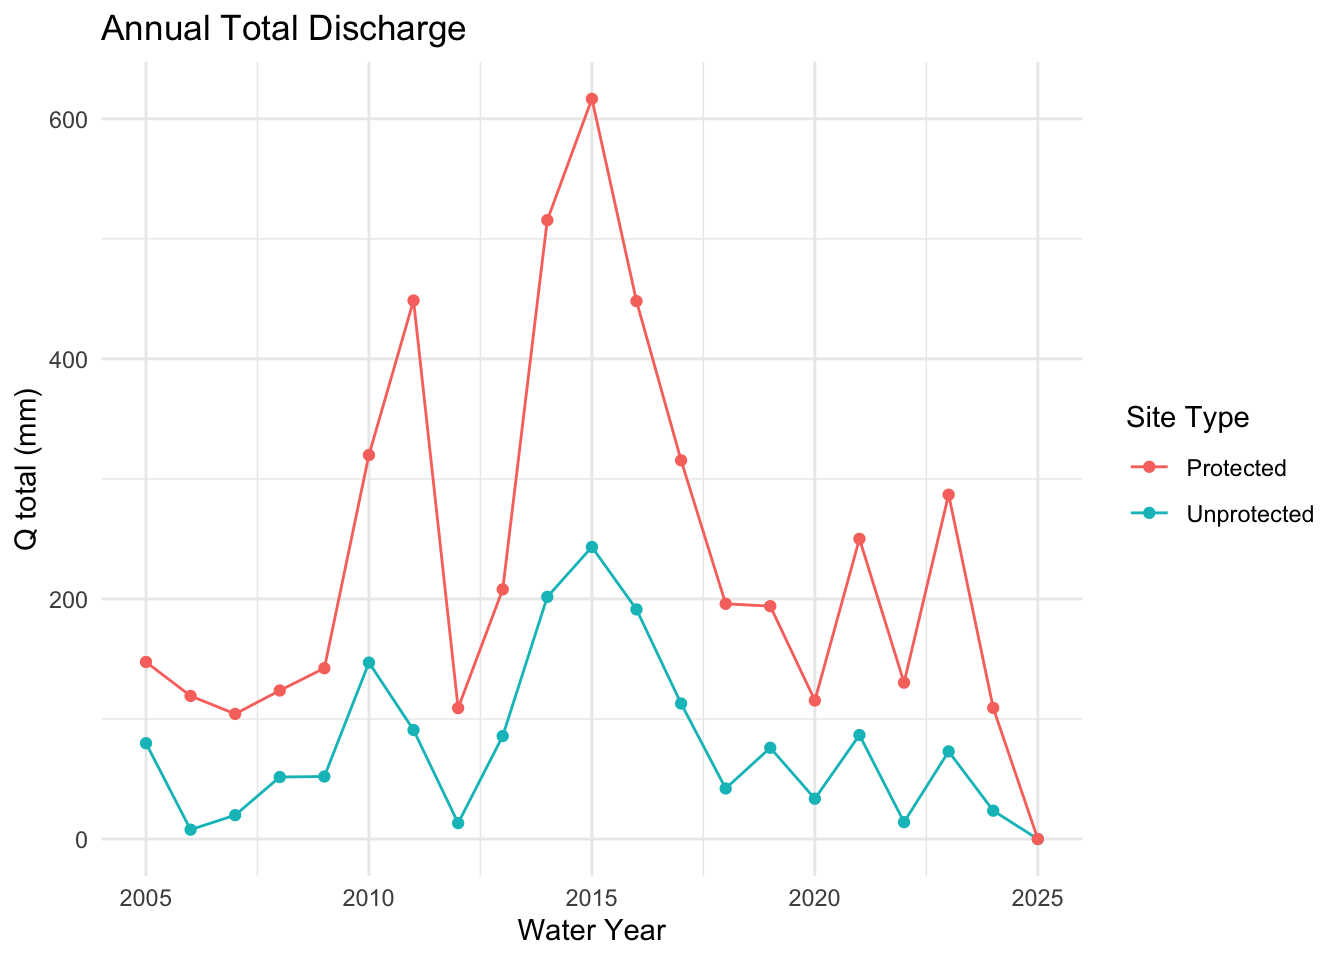

In [ ]:
library(tidyverse)

Data for discharge from 2003-10-01 (water year 2004) to 2024-10-01 (first day of water year 2025) for the USGS sites 06751490 and 06752260 were retrieved from the USGS NWIS site. Following that, the data received was flow/discharge in cfs (cubic feet per second). Therefore, it was best for visualization to convert it to mm/d. Then, creating year and month columns through an ifelse statement allowed for the months to be categorized into a number so that the data groups the data by the hydrologic year (October-September), making it easier to pull out seasonal patterns. In addition, summarizing annual totals allows for better visual comparison between the two rivers.

Rows: 24 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Year/Month, Max Temperature, Min Temperature, Preciptation

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 264 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Year/Month, Max Temperature, Min Temperature, Precipitation

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

[1] 0

[1] 0

     Year/Month Max Temperature Min Temperature    Preciptation 
              0               0               0               0 

     Year/Month Max Temperature Min Temperature   Precipitation 
              0               0               0               0 

ℹ Please use `linewidth` instead.

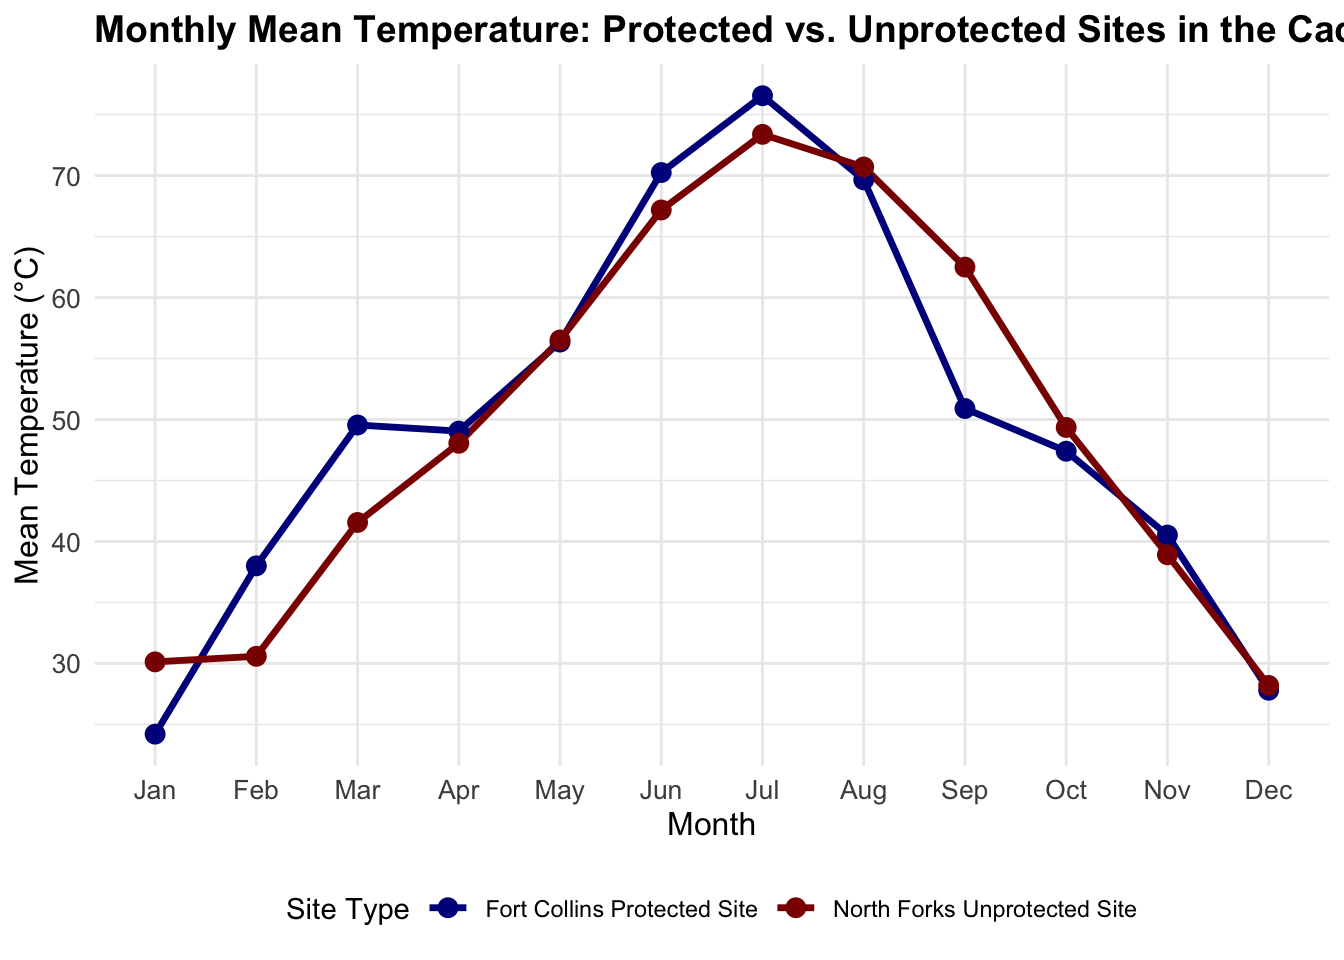

In [ ]:
# Protected site data from CCC

Protected_data_URL <- 'https://raw.githubusercontent.com/madi-schartz/Lab6/main/data/Protected_data.csv'

Protected_data <- readr::read_csv(Protected_data_URL)

Data for temperature was found through the Colorado Climate Center- CSU which had two different data sets for our protected and unprotected sites along the Cache la Poudre. The protected site within Fort Collins has data only from 2016-2017 so it was more limited than what we were wanting but the unprotected site has data from 2003-2024 which aligns with the time frame we were wanting to look at. The data was pretty straight forward from there without needing too much cleaning, we only added a mean temperature column to make tests, visualizing, and plotting easier as the original data source had it separated into Min Temp and Max Temp columns.

# Identify your Preliminary Methods

1.  What are you thinking about using to analyze your data to answer your question?

In the future to further analyze the data, we can possibly test if there is a relationship between temperature and discharge/flow. For example, doing a linear regression model could test for linear association. We also found data for precipitation so we can run some statistical tests to see if precipitation, temperature, and discharge are all correlated in affecting water quality then further to see if there’s a difference in the water quality between the unprotected and protected water sites.

1.  Do you have everything you need? What supplemental data might you need?

Some supplemental data that we might need is water quality data such as nutrient loads, dissolved oxygen, pH, turbidity, or contaminant levels. This would provide insights to assessing pollution impacts and ecological health, allowing us to test whether protected areas with endangered species or within national parks maintain better water quality compared to unprotected downstream areas.

1.  What are some potential challenges you see in the data?

Some potential challenges that I see in the data is getting longer time periods due to the fact that a lot of datasets were removed from USGS data. Also, our temperature data, there wasn’t anything in the USGS for it so we had to go to another source that had data from 2003-2024 for our protected site but for the unprotected site it only had 2016-2017 which is a challenge for what we wanted to show on our time frame.

1.  What are some potential challenges you see in the methods?

Some potential challenges within the methods include getting data for the USGS sites, specifically considering that they did not contain the water quality data that we were looking for. Although we were able to find temperature and discharge, finding additional supplemental data would be very helpful in addressing the proposed problem. Therefore, one challenge is finding the specific points where water quality data (was not found on USGS) will be located for the given period and precise site locations.

1.  How do the selected methods help you get to your final goals?

Our selected methods that we have done already with doing data exploratory analysis with our predictor variables of water temperatures and discharge rates have shown given us a strong foundation of where we need more data and tests to be done in order to get to our final goals of analyzing how water quality differs at our protected and unprotected water sites along the Cache la Poudre. We have addressed the prior questions for our preliminary methods based off of our exploratory data analysis and from there our methods of further doing statistical tests, linear regressions, and finding supplemental data for more predictor variables in relation to water quality will greatly aid in our ability to see any correlation and analyze the relationship between all our variables and water quality to provide us something to then compare on both sites with which is our final goal.